In [288]:
%pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn prettytable xgboost

Note: you may need to restart the kernel to use updated packages.


In [289]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [290]:
kaggle_data = pd.read_csv('./employee_promotion.csv')
kaggle_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [291]:
# Load data
data = pd.read_csv('../data engineering/reporting/REPORT_final.csv')
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score,retention
0,65438,Alice Wilson,alice.wilson@gmail.com,Sales & Marketing,35,8,0,10,49.0,False
1,65141,Liam Lee,liam.lee@gmail.com,Operations,30,4,0,10,60.0,True
2,7513,Liam Johnson,liam.johnson@gmail.com,Sales & Marketing,34,7,0,10,50.0,False
3,2542,Victor Davis,victor.davis@gmail.com,Sales & Marketing,39,10,0,10,50.0,False
4,48945,David Brooks,david.brooks@gmail.com,Technology,45,2,0,10,73.0,True
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Zach Johnson,zach_johnson723@gmail.com,Technology,48,17,0,10,78.0,True
54804,74592,Frank Davis,frank_davis41@gmail.com,Operations,37,6,0,10,56.0,True
54805,13918,Isabella Edwards,isabella_edwards756@gmail.com,Analytics,27,3,0,10,79.0,True
54806,13614,Uma Wood,uma_wood710@gmail.com,Sales & Marketing,29,2,0,10,0.0,False


In [292]:
data["no_of_trainings"] = kaggle_data["no_of_trainings"]

In [293]:
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score,retention
0,65438,Alice Wilson,alice.wilson@gmail.com,Sales & Marketing,35,8,0,1,49.0,False
1,65141,Liam Lee,liam.lee@gmail.com,Operations,30,4,0,1,60.0,True
2,7513,Liam Johnson,liam.johnson@gmail.com,Sales & Marketing,34,7,0,1,50.0,False
3,2542,Victor Davis,victor.davis@gmail.com,Sales & Marketing,39,10,0,2,50.0,False
4,48945,David Brooks,david.brooks@gmail.com,Technology,45,2,0,1,73.0,True
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Zach Johnson,zach_johnson723@gmail.com,Technology,48,17,0,1,78.0,True
54804,74592,Frank Davis,frank_davis41@gmail.com,Operations,37,6,0,1,56.0,True
54805,13918,Isabella Edwards,isabella_edwards756@gmail.com,Analytics,27,3,0,1,79.0,True
54806,13614,Uma Wood,uma_wood710@gmail.com,Sales & Marketing,29,2,0,1,0.0,False


EDA

In [294]:
data.columns

Index(['employee_id', 'name', 'email', 'designation', 'age',
       'length_of_service', 'is_promoted', 'no_of_trainings',
       'avg_training_score', 'retention'],
      dtype='object')

In [295]:
data.isnull().sum()

employee_id           0
name                  0
email                 0
designation           0
age                   0
length_of_service     0
is_promoted           0
no_of_trainings       0
avg_training_score    0
retention             0
dtype: int64

In [296]:
print('lenght of data is', len(data))

lenght of data is 54808


In [297]:
data.shape

(54808, 10)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   name                54808 non-null  object 
 2   email               54808 non-null  object 
 3   designation         54808 non-null  object 
 4   age                 54808 non-null  int64  
 5   length_of_service   54808 non-null  int64  
 6   is_promoted         54808 non-null  int64  
 7   no_of_trainings     54808 non-null  int64  
 8   avg_training_score  54808 non-null  float64
 9   retention           54808 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 3.8+ MB


In [299]:
data.dtypes

employee_id             int64
name                   object
email                  object
designation            object
age                     int64
length_of_service       int64
is_promoted             int64
no_of_trainings         int64
avg_training_score    float64
retention                bool
dtype: object

In [300]:
np.sum(data.isnull().any(axis=1))


np.int64(0)

In [301]:
data.isnull().sum()

employee_id           0
name                  0
email                 0
designation           0
age                   0
length_of_service     0
is_promoted           0
no_of_trainings       0
avg_training_score    0
retention             0
dtype: int64

In [302]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   10


In [303]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   54808


In [304]:
data.describe()

,employee_id,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,34.803915,5.865512,0.085170,1.253011,60.736334
std,22586.581449,7.660169,4.265094,0.279137,0.609264,18.842781
min,1.000000,20.000000,1.000000,0.000000,1.000000,0.000000
25%,19669.750000,29.000000,3.000000,0.000000,1.000000,50.000000
50%,39225.500000,33.000000,5.000000,0.000000,1.000000,59.000000
75%,58730.500000,39.000000,7.000000,0.000000,1.000000,76.000000
max,78298.000000,60.000000,37.000000,1.000000,10.000000,99.000000


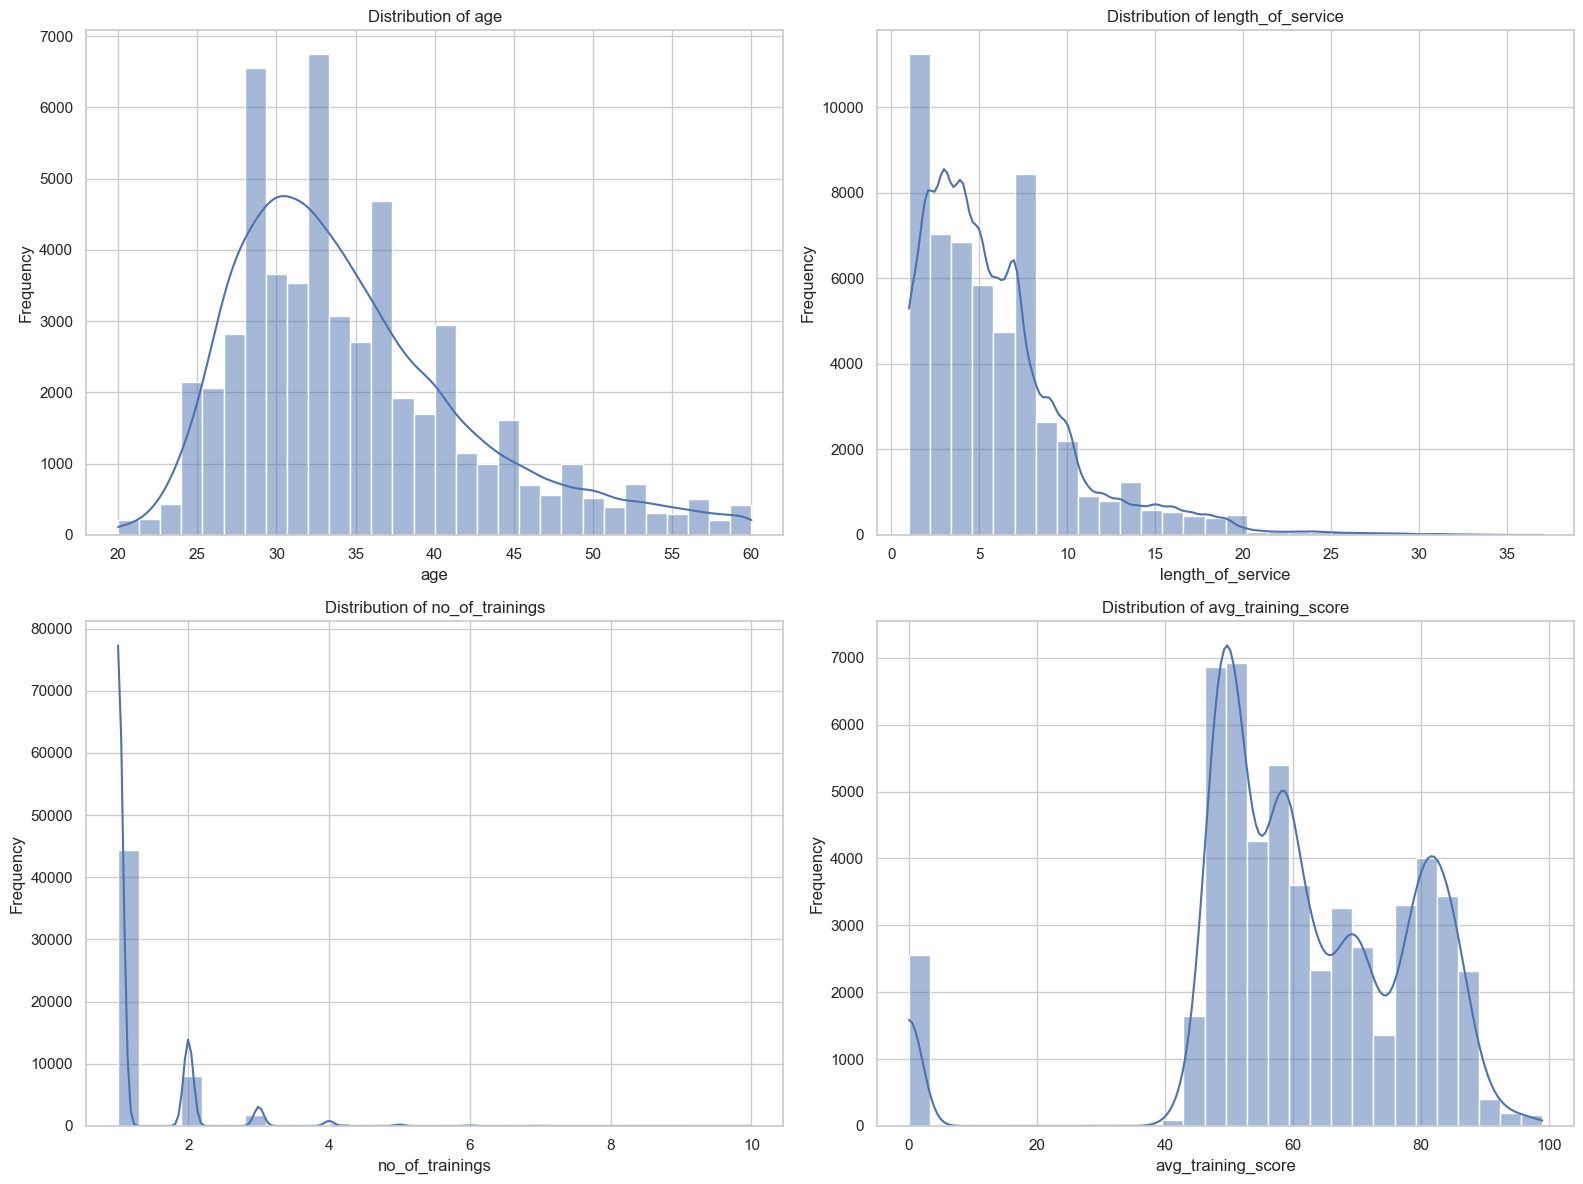

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distributions of numerical features
num_cols = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


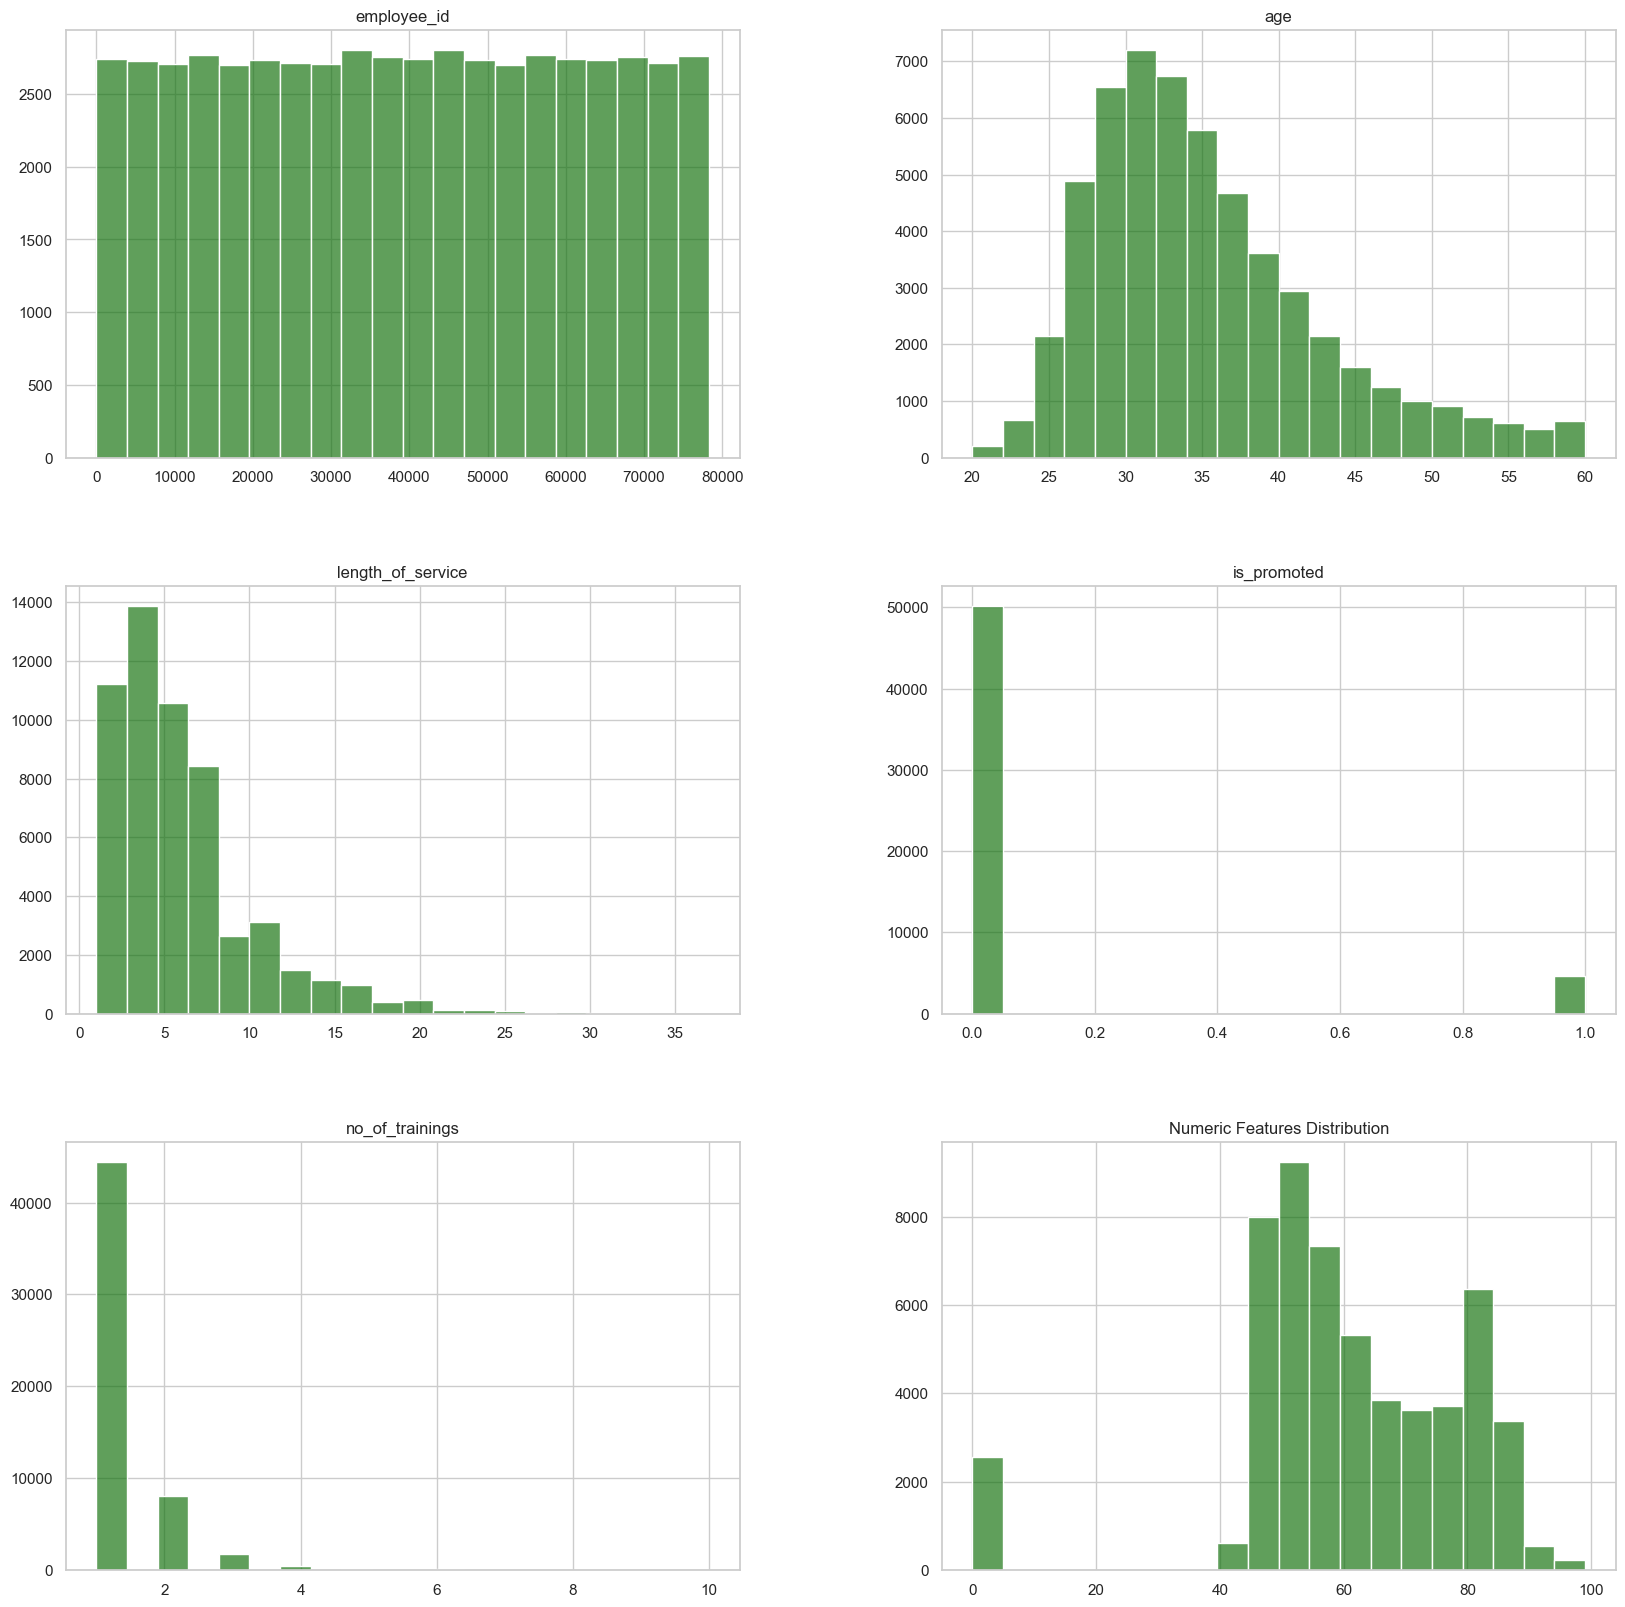

In [306]:
data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

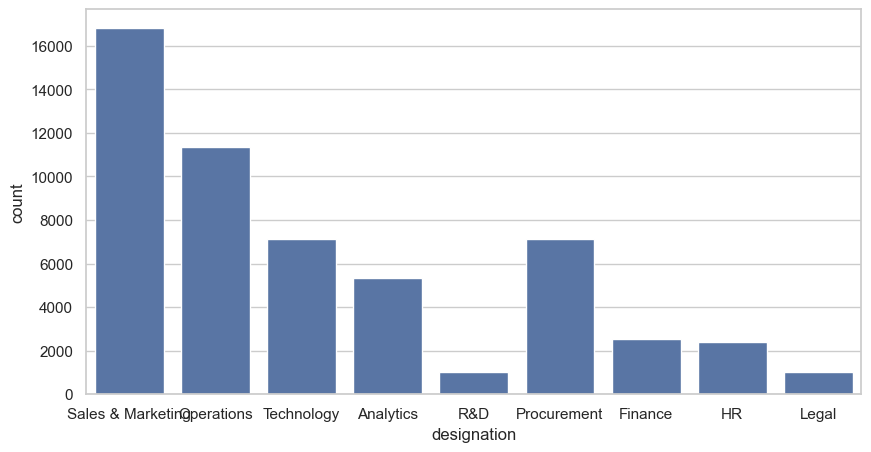

In [307]:
sns.countplot(data= data, x = "designation")
plt.show()

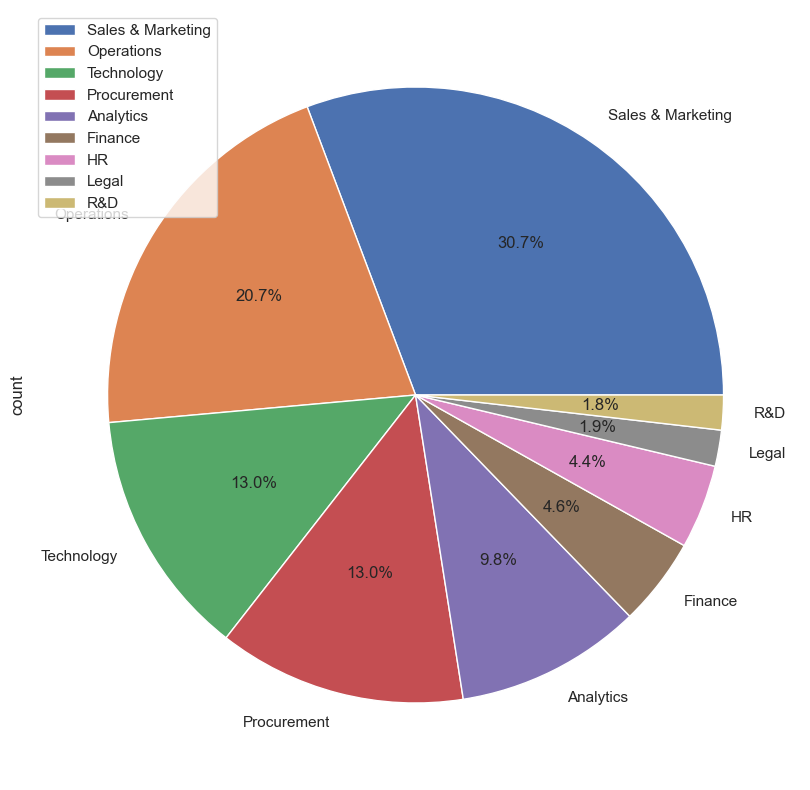

In [308]:
data["designation"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

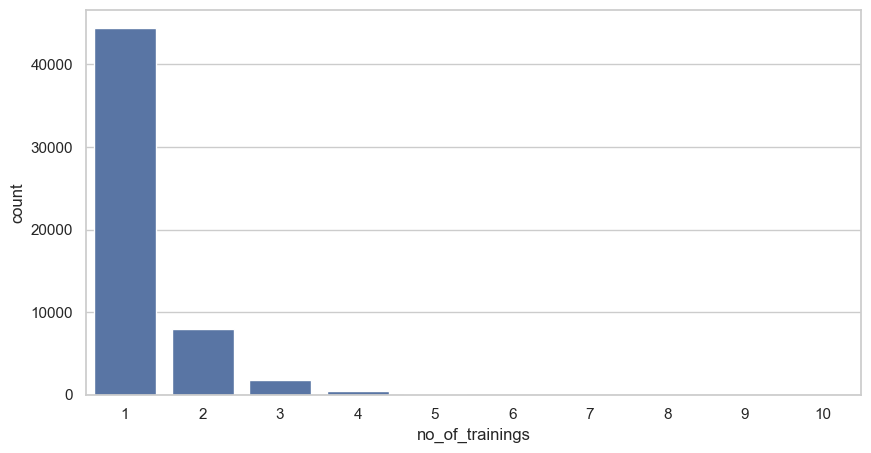

In [309]:
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

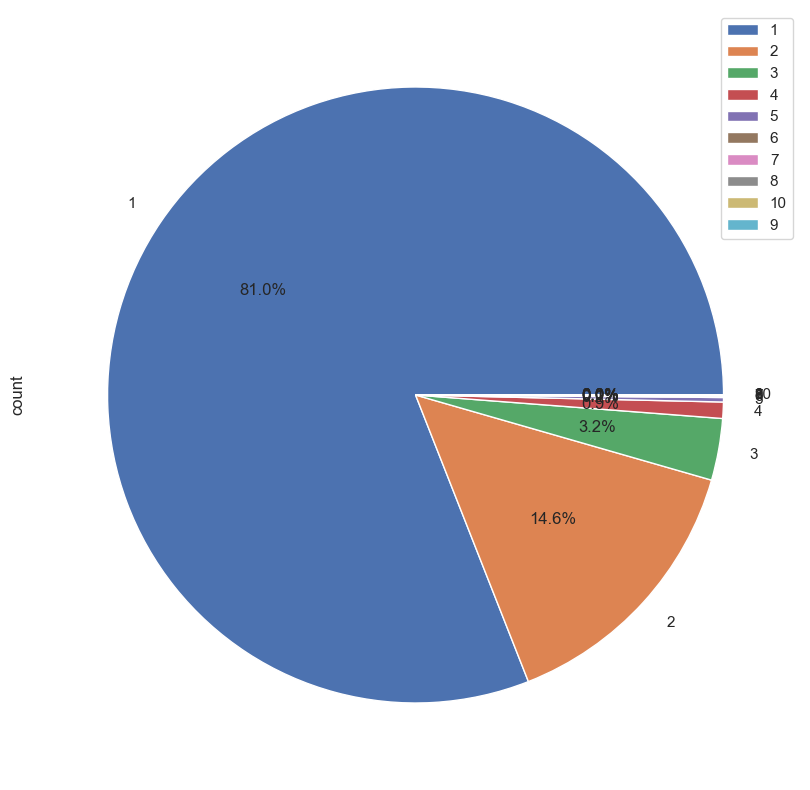

In [310]:
data["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [311]:
# plt.figure(figsize=(12,10))
# sns.countplot(data.age)
# plt.xticks(rotation=90)

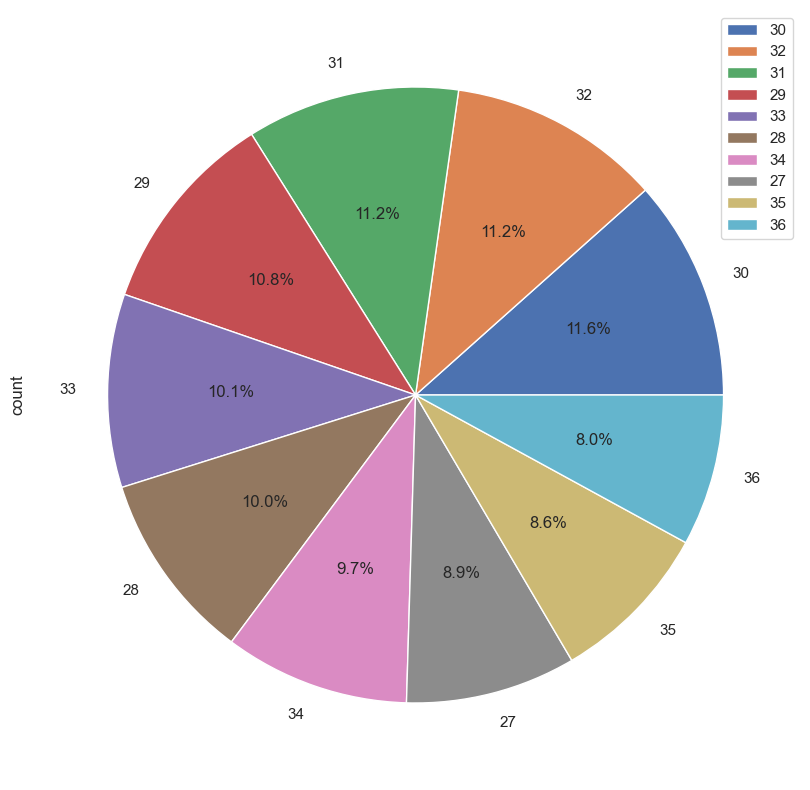

In [312]:
data["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [313]:
# plt.figure(figsize=(12,10))
# sns.countplot(data.length_of_service)
# plt.xticks(rotation=90)

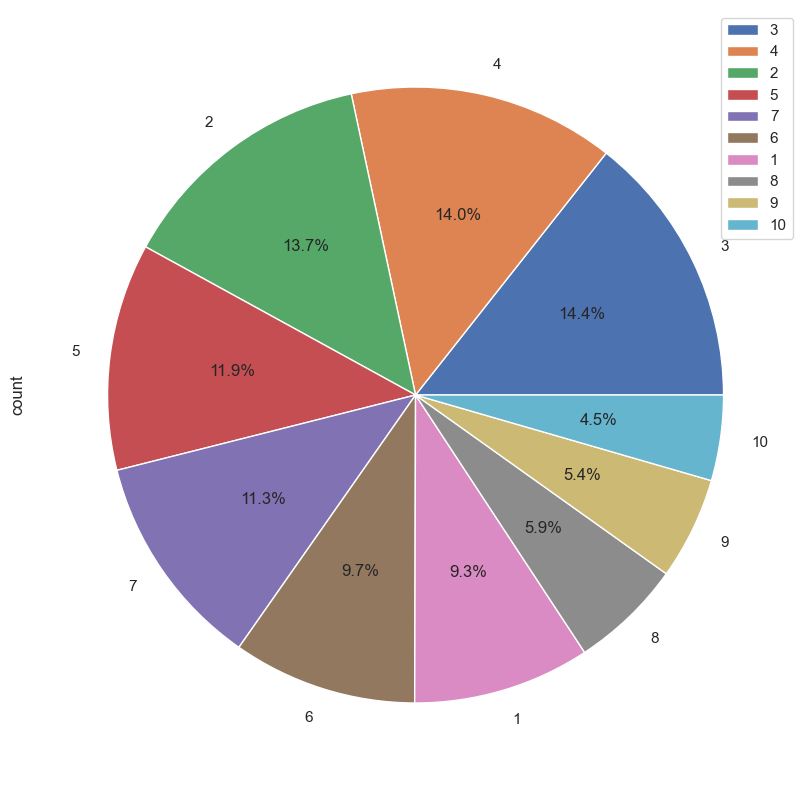

In [314]:
data["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

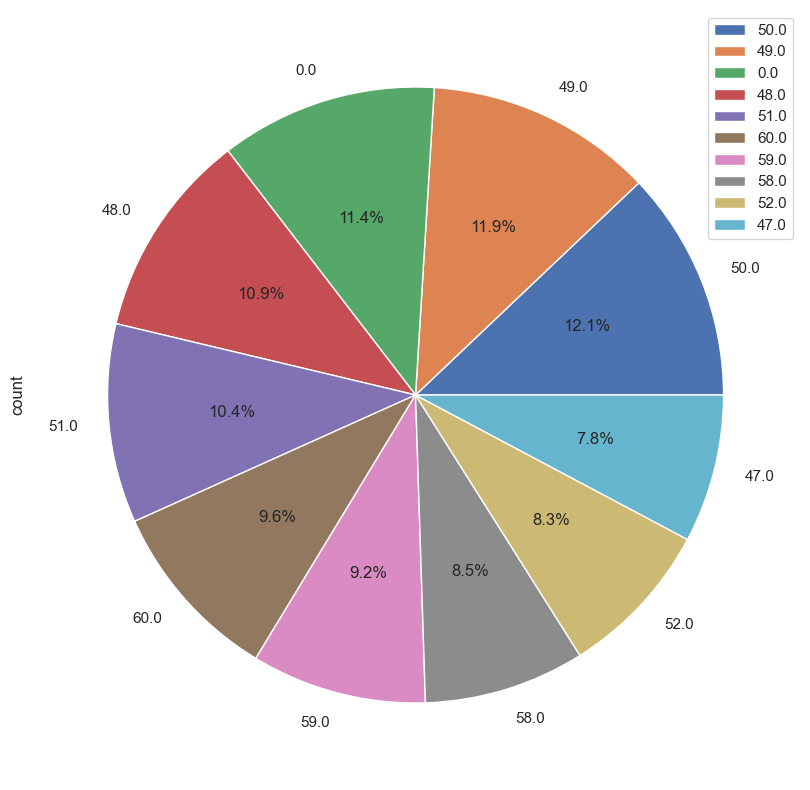

In [315]:
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

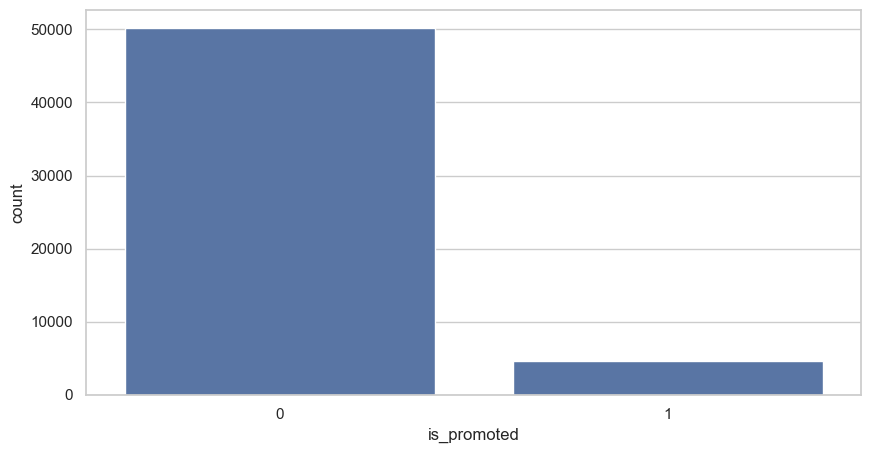

In [316]:
sns.countplot(data= data, x = "is_promoted")
plt.show()

In [317]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

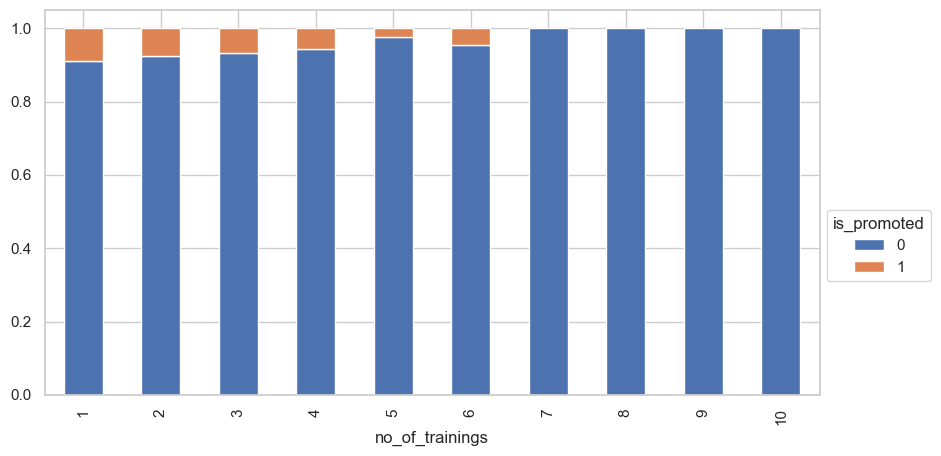

In [318]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

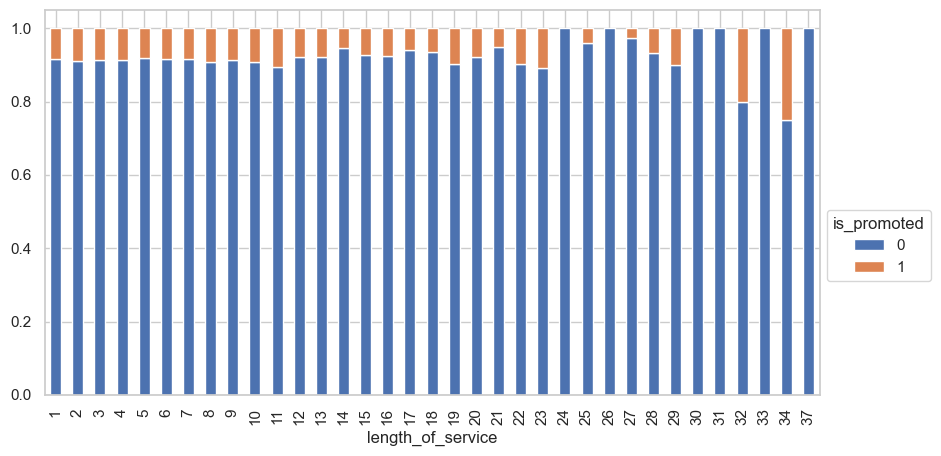

In [319]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.length_of_service,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [320]:
data.select_dtypes(include='object')

,name,email,designation
0,Alice Wilson,alice.wilson@gmail.com,Sales & Marketing
1,Liam Lee,liam.lee@gmail.com,Operations
2,Liam Johnson,liam.johnson@gmail.com,Sales & Marketing
3,Victor Davis,victor.davis@gmail.com,Sales & Marketing
4,David Brooks,david.brooks@gmail.com,Technology
...,...,...,...
54803,Zach Johnson,zach_johnson723@gmail.com,Technology
54804,Frank Davis,frank_davis41@gmail.com,Operations
54805,Isabella Edwards,isabella_edwards756@gmail.com,Analytics
54806,Uma Wood,uma_wood710@gmail.com,Sales & Marketing


In [321]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['designation'])
data['designation'] = encpro

In [322]:
data["designation"].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3])

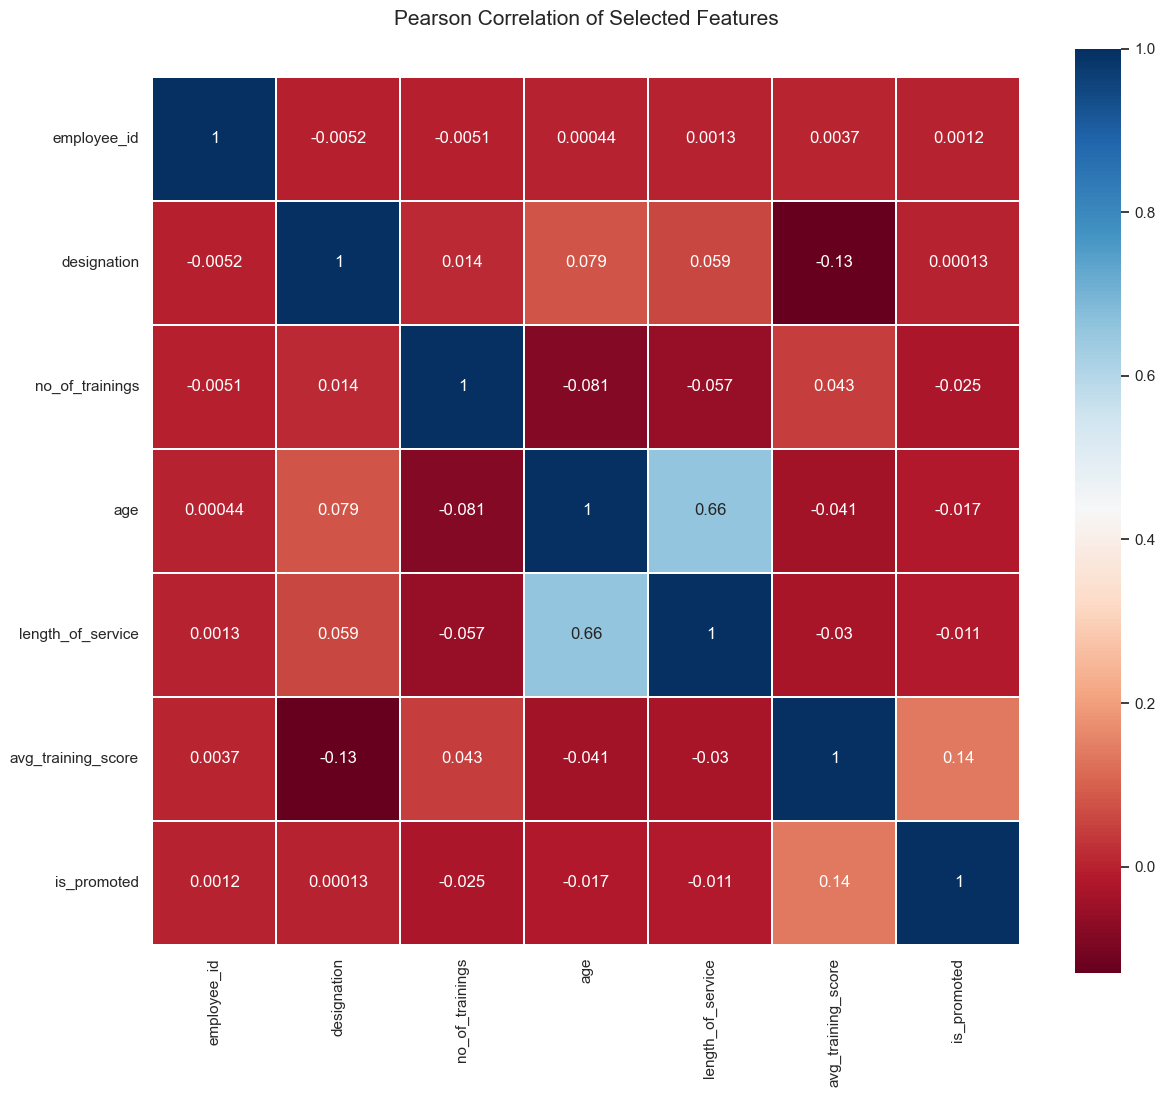

In [323]:
# List of selected columns
selected_columns = ['employee_id', 'designation', 'no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'is_promoted']  # Replace with your actual column names

# Filter the data to only include the selected columns
selected_data = data[selected_columns]

# Plot the correlation matrix for the selected columns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Selected Features', y=1.05, size=15)
sns.heatmap(selected_data.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


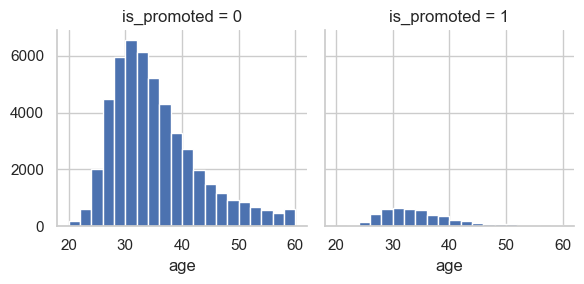

In [324]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'age', bins=20)

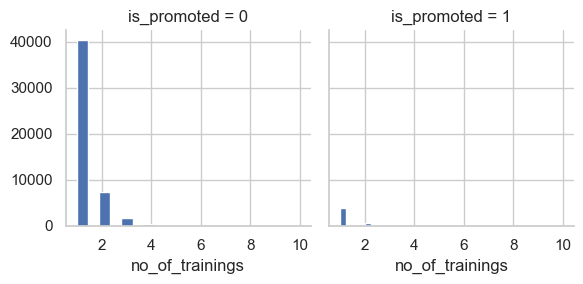

In [325]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

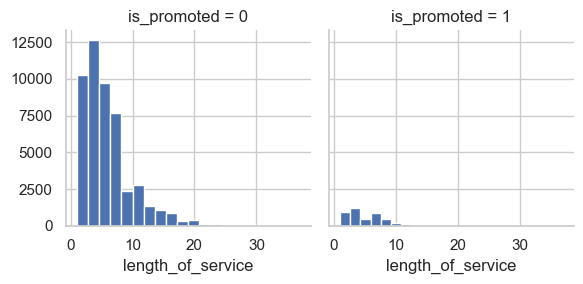

In [326]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

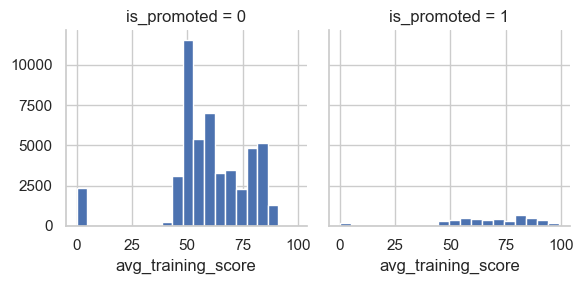

In [327]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

Data Preperation

In [328]:
current=len(data)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  54808


In [329]:
data=data.drop_duplicates()

In [330]:
now=len(data)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  54808


In [331]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  0


In [332]:
data=data.drop(columns=['employee_id', 'name', 'email', 'retention'])

In [333]:
data.isnull().sum()

designation           0
age                   0
length_of_service     0
is_promoted           0
no_of_trainings       0
avg_training_score    0
dtype: int64

In [334]:
data.isnull().sum().sum()/len(data)

np.float64(0.0)

In [335]:
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum() / data.shape[0]) * 100).round(2)

# Create a DataFrame for missing data
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# Display the missing data with a bar style
missing_data.style.bar(color=['gold', 'lightblue'])

,Train_Total,Train_Percent %
age,0,0.000000
avg_training_score,0,0.000000
designation,0,0.000000
is_promoted,0,0.000000
length_of_service,0,0.000000
no_of_trainings,0,0.000000


In [336]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

<Axes: xlabel='is_promoted', ylabel='count'>

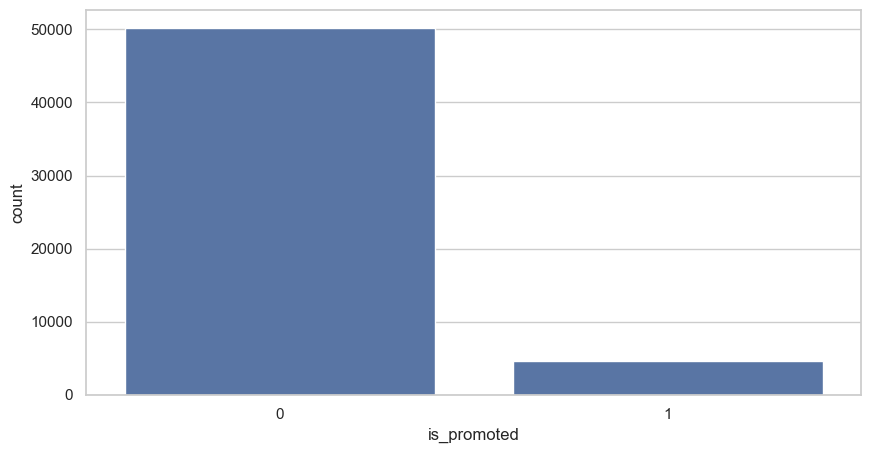

In [337]:
sns.countplot(data= data, x = y)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [339]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

In [340]:
y_pred = LR.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15035
           1       0.66      0.34      0.45      1408

    accuracy                           0.93     16443
   macro avg       0.80      0.66      0.71     16443
weighted avg       0.92      0.93      0.92     16443



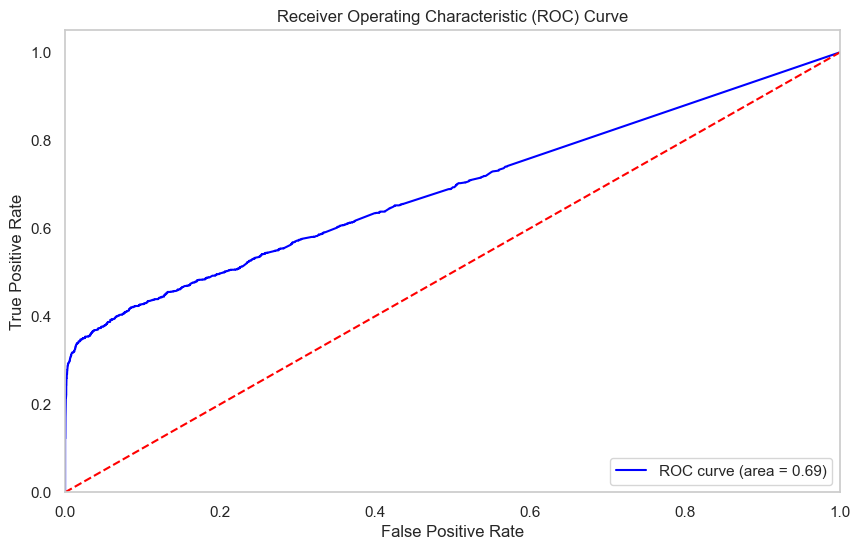

In [341]:
y_prob = LR.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

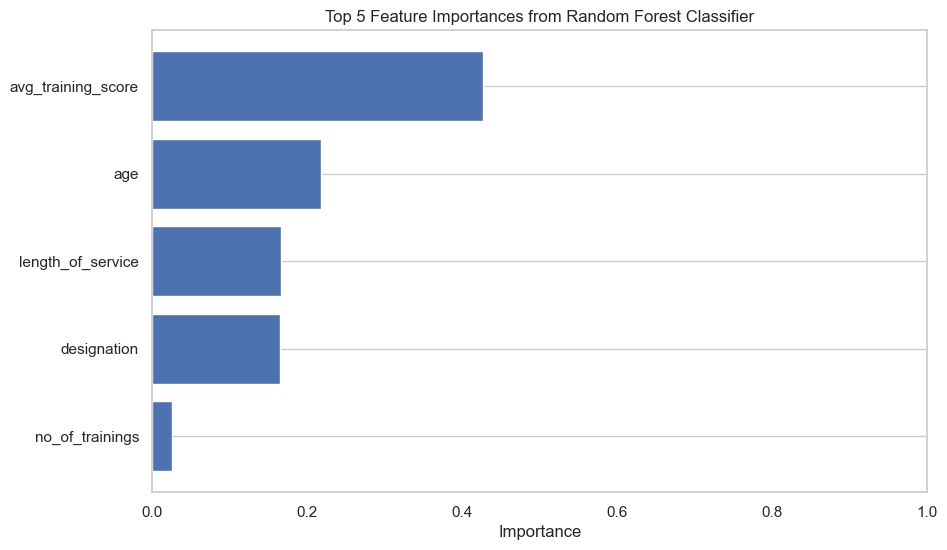

              Feature  Importance
0     no_of_trainings    0.025793
1         designation    0.164149
2   length_of_service    0.166617
3                 age    0.217085
4  avg_training_score    0.426356


In [342]:
importances = LR.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

# Display the DataFrame of feature importances
print(feature_importances_df)

In [343]:
DT = DecisionTreeClassifier()
DT= DT.fit(X_train , y_train)
DT

DecisionTreeClassifier()

In [344]:
y_pred = DT.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     15035
           1       0.51      0.35      0.42      1408

    accuracy                           0.92     16443
   macro avg       0.72      0.66      0.69     16443
weighted avg       0.90      0.92      0.91     16443



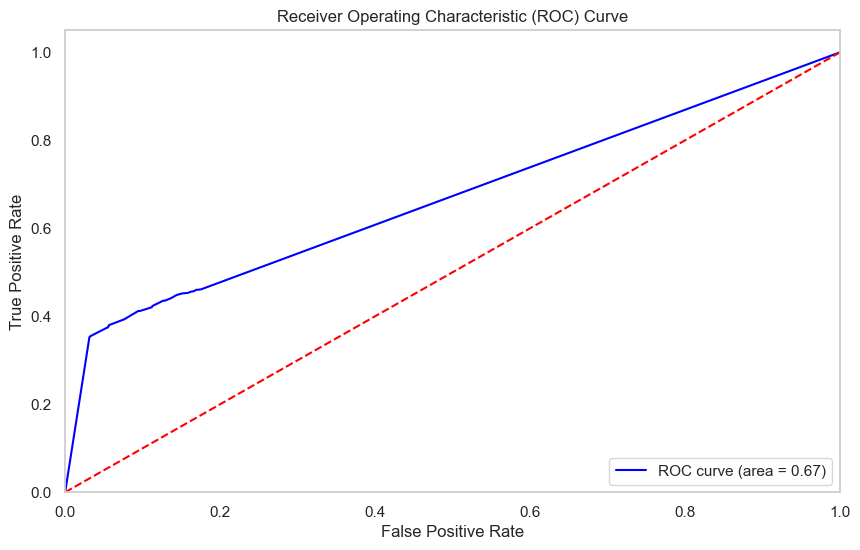

In [345]:
y_prob = DT.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

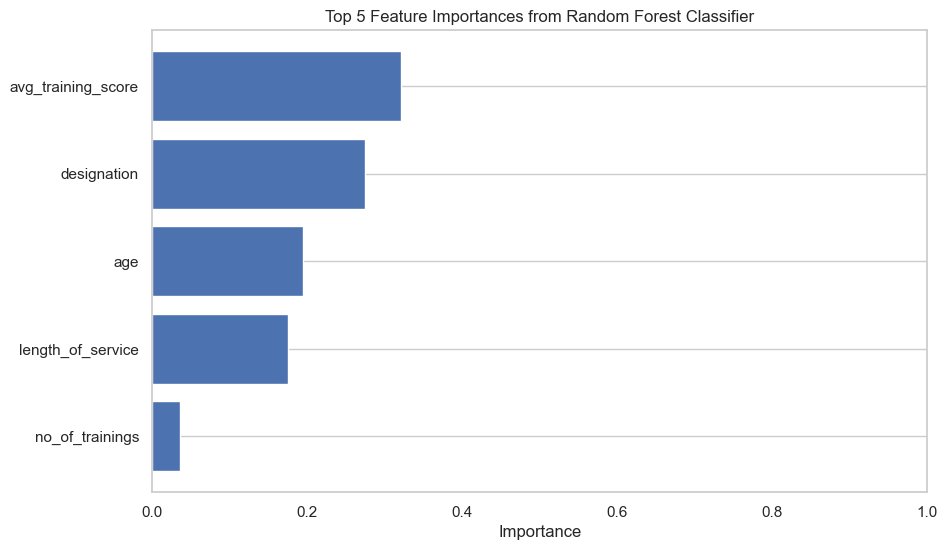

              Feature  Importance
0     no_of_trainings    0.035867
1   length_of_service    0.175190
2                 age    0.194876
3         designation    0.273817
4  avg_training_score    0.320250


In [346]:
importances = DT.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

# Display the DataFrame of feature importances
print(feature_importances_df)

In [347]:
logistic = LogisticRegression()  # You can adjust n_neighbors as needed
logistic.fit(X_train, y_train)
logistic

LogisticRegression()

In [348]:
y_pred = logistic.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     15035
           1       0.00      0.00      0.00      1408

    accuracy                           0.91     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.91      0.87     16443



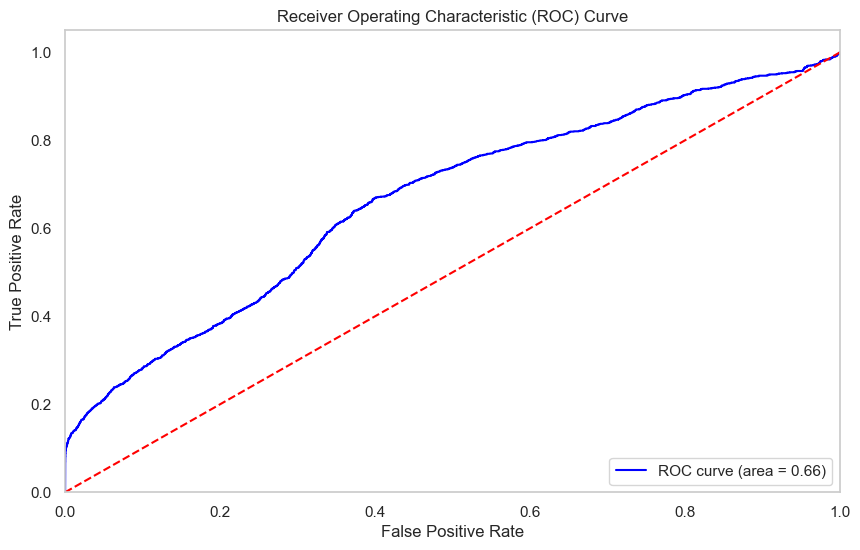

In [349]:
y_prob = logistic.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

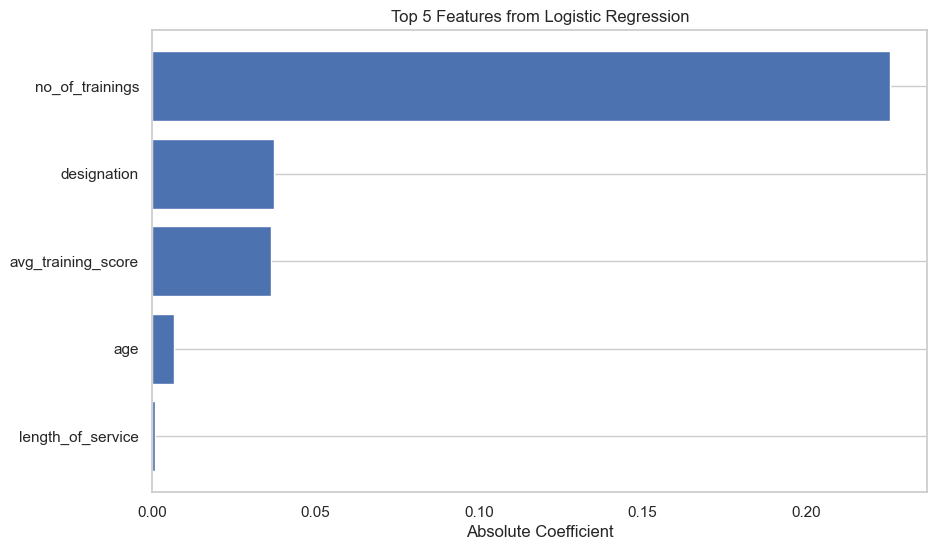

In [350]:
coefficients = logistic.coef_[0]  # Use [0] to get the 1D array of coefficients
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importances_df['Absolute Coefficient'] = feature_importances_df['Coefficient'].abs()
feature_importances_df = feature_importances_df.sort_values(by='Absolute Coefficient', ascending=True)

# Get the top 5 features
top_features_df = feature_importances_df.head(5)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 5 Features from Logistic Regression')
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

In [351]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

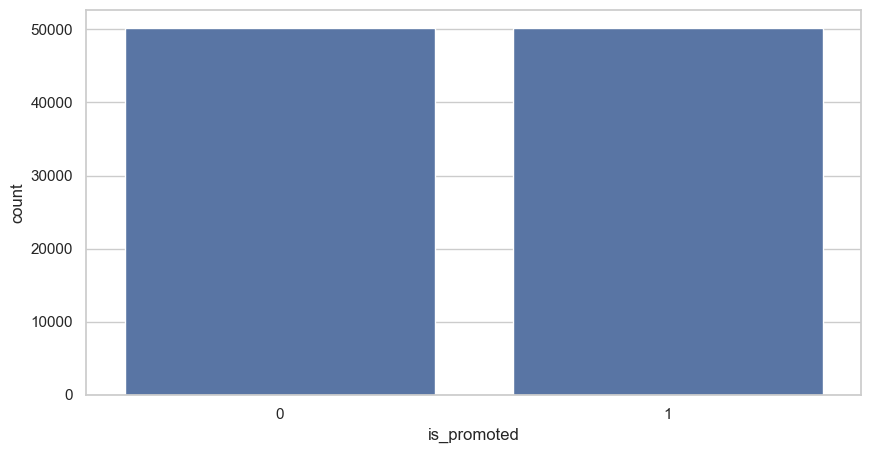

In [352]:
sns.countplot(data= data, x = y_up)

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

In [354]:
LR_up=RandomForestClassifier()
LR_up= LR_up.fit(X_train , y_train)
LR_up

RandomForestClassifier()

In [355]:
y_pred = LR_up.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     15105
           1       0.86      0.88      0.87     14979

    accuracy                           0.87     30084
   macro avg       0.87      0.87      0.87     30084
weighted avg       0.87      0.87      0.87     30084



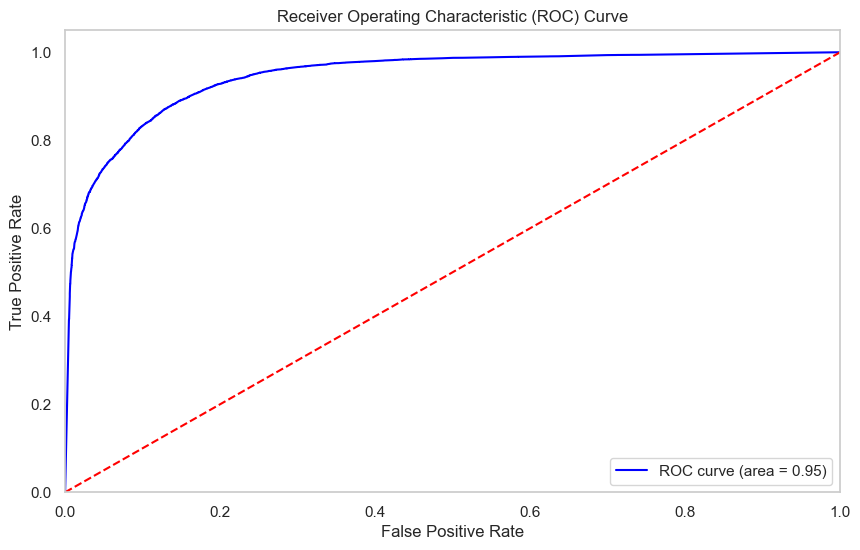

In [356]:
y_prob = LR_up.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

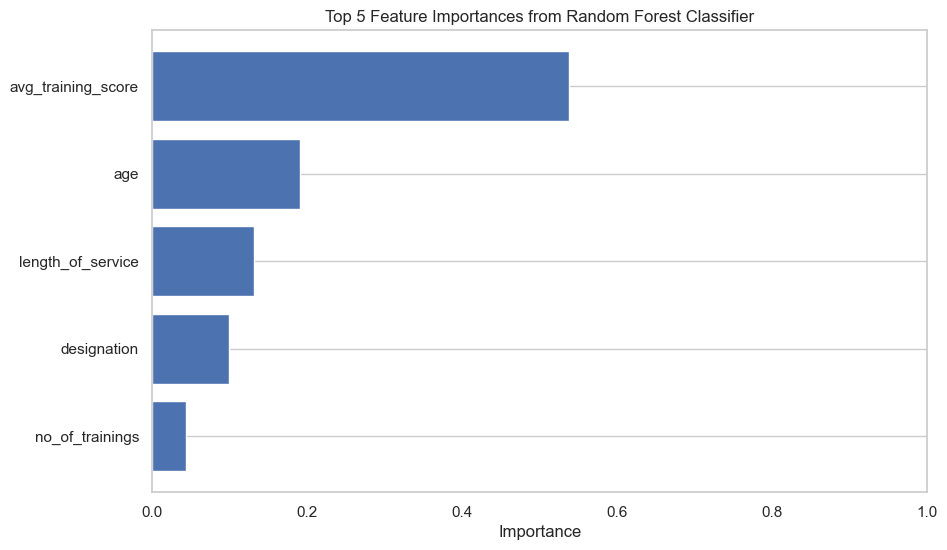

In [357]:
importances = LR_up.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

# Display the DataFrame of feature importances

In [358]:
DT_up=DecisionTreeClassifier()
DT_up= DT_up.fit(X_train , y_train)
DT_up

DecisionTreeClassifier()

In [359]:
y_pred = DT_up.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     15105
           1       0.86      0.88      0.87     14979

    accuracy                           0.87     30084
   macro avg       0.87      0.87      0.87     30084
weighted avg       0.87      0.87      0.87     30084



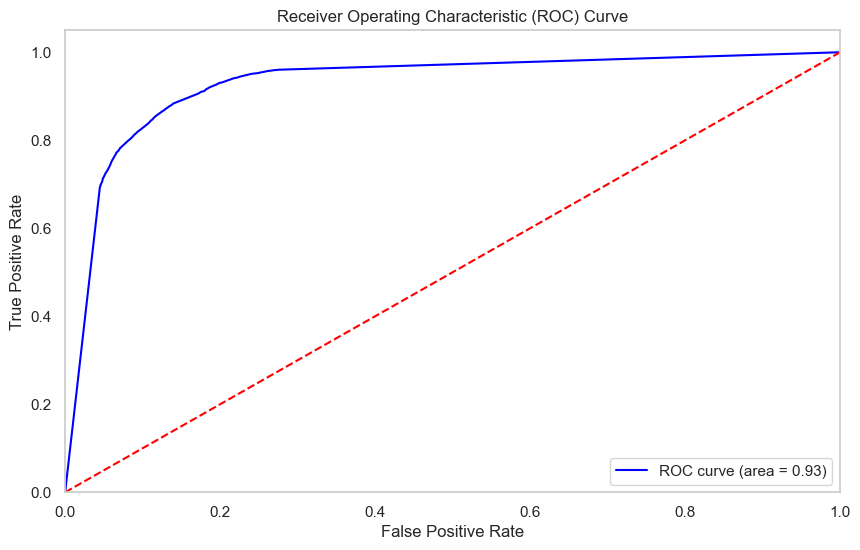

In [360]:
y_prob = DT_up.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

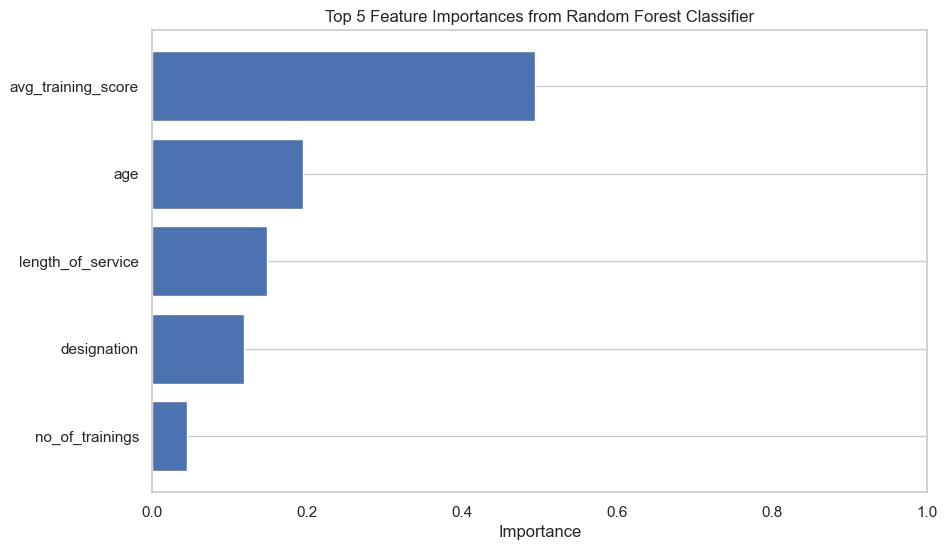

In [361]:
importances = DT_up.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()


In [362]:
logistic_up = LogisticRegression()  # You can adjust n_neighbors as needed
logistic_up.fit(X_train, y_train)
logistic_up

LogisticRegression()

In [363]:
y_pred = logistic_up.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64     15105
           1       0.64      0.66      0.65     14979

    accuracy                           0.65     30084
   macro avg       0.65      0.65      0.65     30084
weighted avg       0.65      0.65      0.65     30084



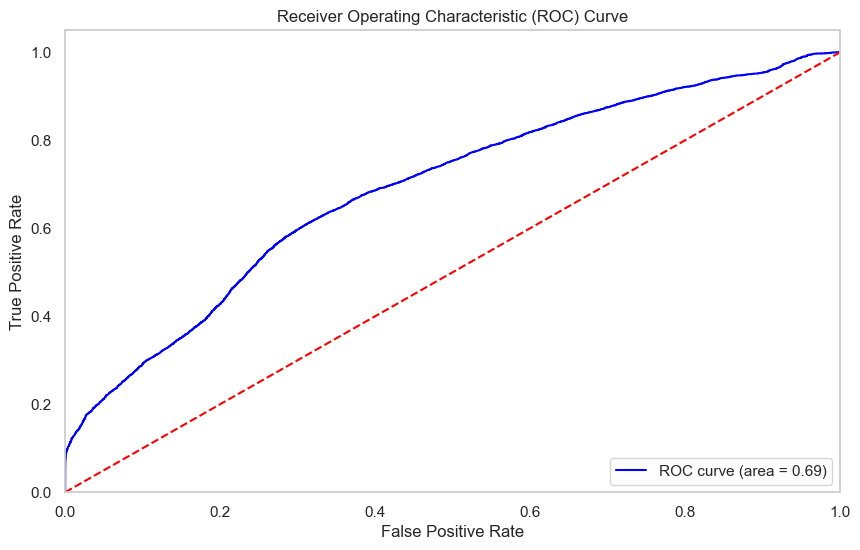

In [364]:
y_prob = logistic_up.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

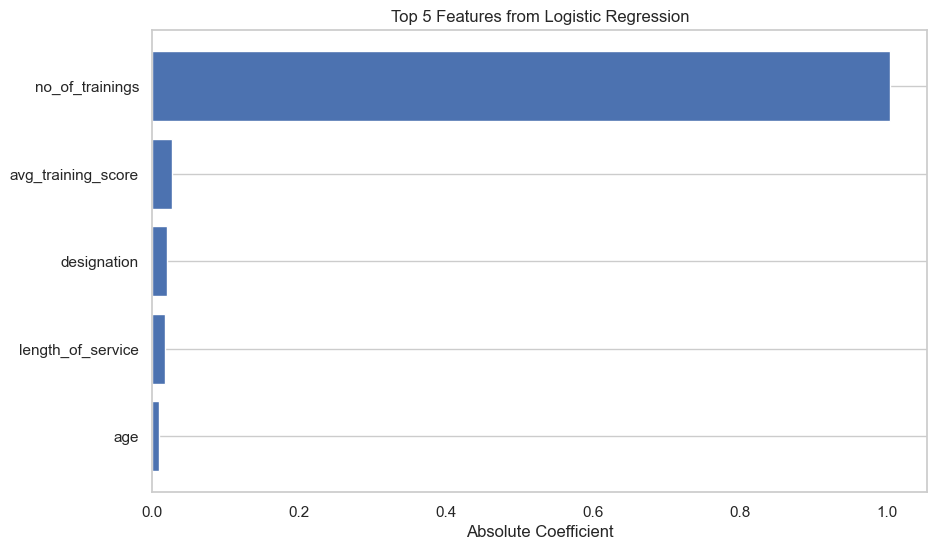

In [365]:
coefficients = logistic_up.coef_[0]  # Use [0] to get the 1D array of coefficients
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importances_df['Absolute Coefficient'] = feature_importances_df['Coefficient'].abs()
feature_importances_df = feature_importances_df.sort_values(by='Absolute Coefficient', ascending=True)

# Get the top 5 features
top_features_df = feature_importances_df.head(5)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 5 Features from Logistic Regression')
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

In [366]:
# print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

In [367]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [368]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
11,7,35,3,1,1,50.0
39,7,33,6,1,1,51.0
60,7,50,17,1,1,47.0
66,1,27,1,1,1,58.0
67,7,27,1,1,1,0.0
...,...,...,...,...,...,...
9853,4,45,13,0,1,58.0
26810,7,32,7,0,1,53.0
39909,4,40,4,0,1,0.0
49932,5,35,3,0,1,69.0


<Axes: xlabel='is_promoted', ylabel='count'>

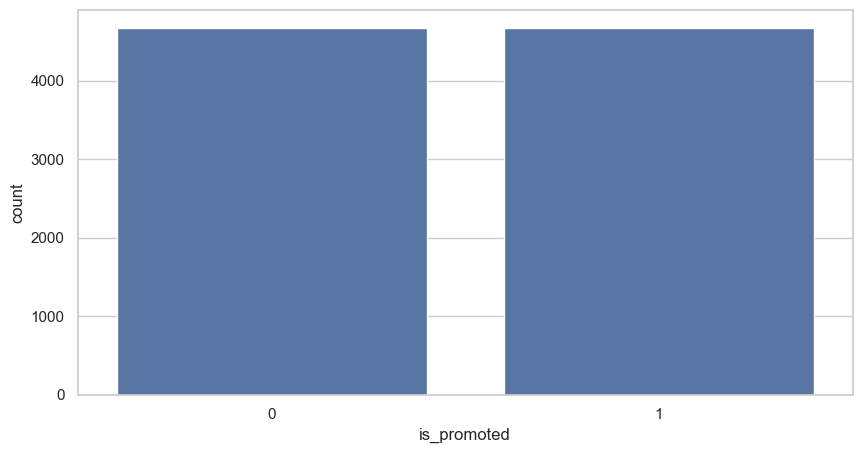

In [369]:
sns.countplot(data= data, x = downsample['is_promoted'])

In [370]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

In [371]:
LR_down=RandomForestClassifier()
LR_down= LR_down.fit(X_train , y_train)
LR_down

RandomForestClassifier()

In [372]:
y_pred = LR_down.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1373
           1       0.66      0.58      0.62      1428

    accuracy                           0.63      2801
   macro avg       0.63      0.63      0.63      2801
weighted avg       0.63      0.63      0.63      2801



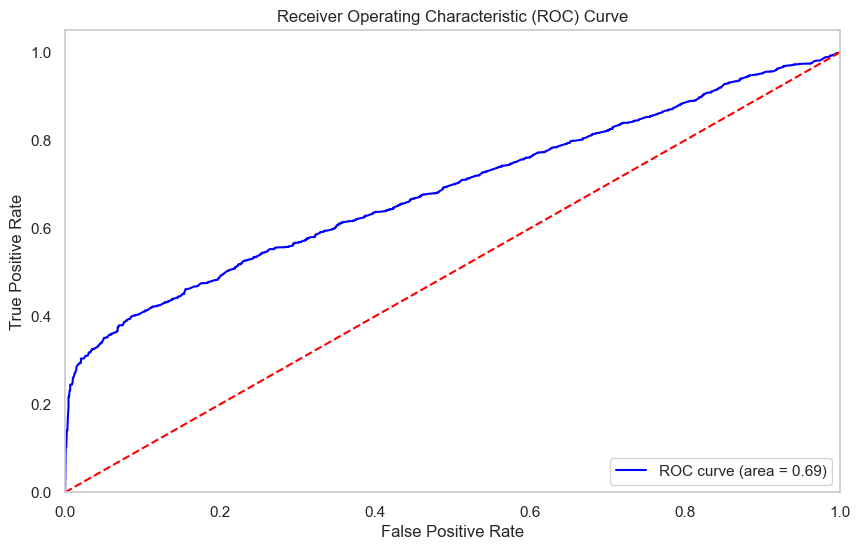

In [373]:
y_prob = LR_down.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

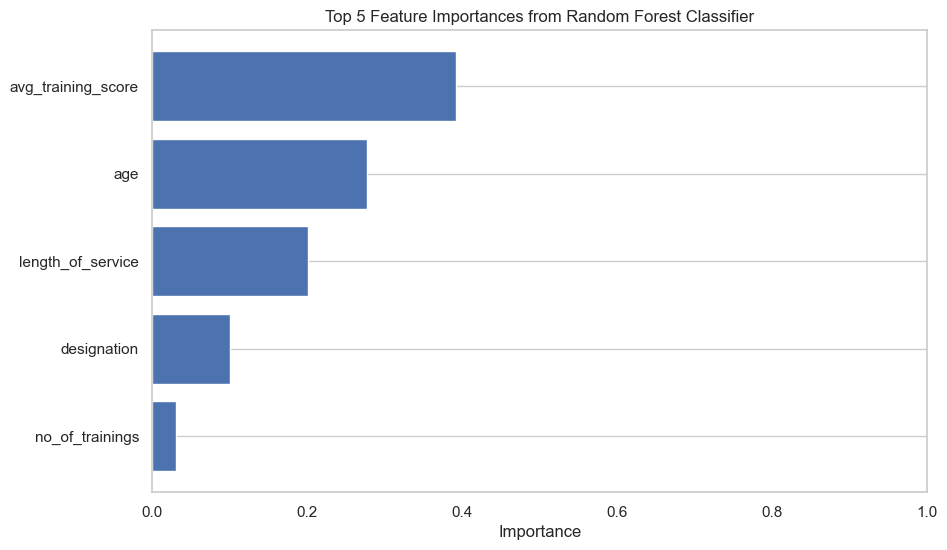

In [374]:
importances = LR_down.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

In [375]:
DT_down = DecisionTreeClassifier()
DT_down= DT_down.fit(X_train , y_train)
DT_down

DecisionTreeClassifier()

In [376]:
y_pred = DT_down.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1373
           1       0.63      0.59      0.61      1428

    accuracy                           0.61      2801
   macro avg       0.61      0.61      0.61      2801
weighted avg       0.61      0.61      0.61      2801



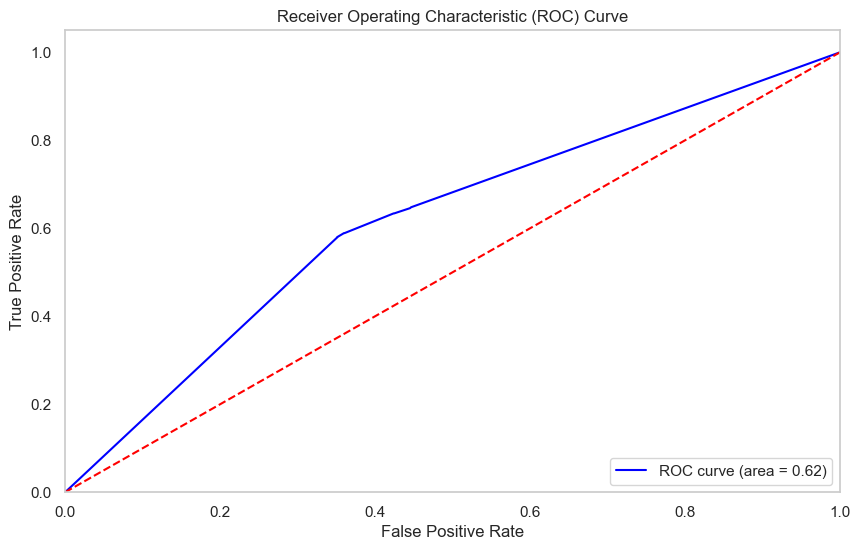

In [377]:
y_prob = DT_down.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

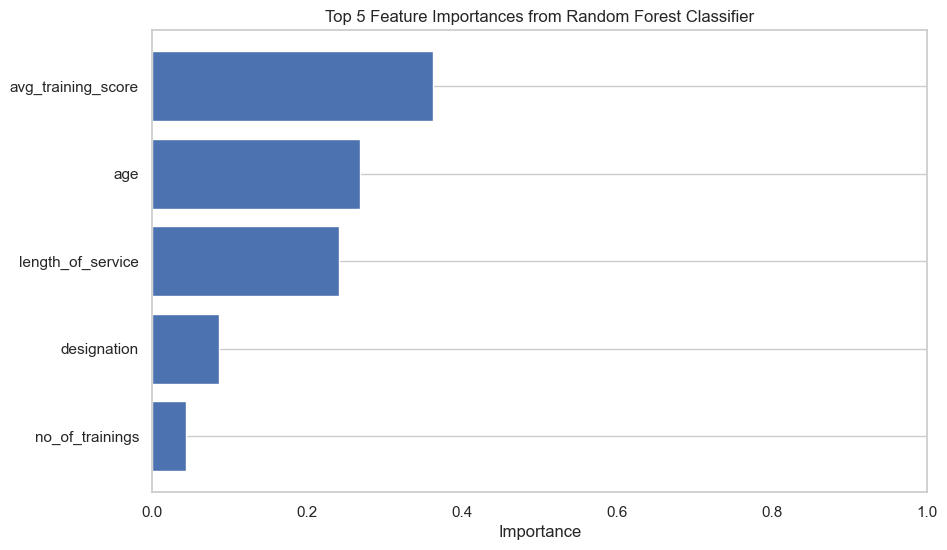

In [378]:
importances = DT_down.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns[indices],  # Assuming X_train is a DataFrame
    'Importance': importances[indices]
}).sort_values(by='Importance', ascending=True)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')
plt.xlim(0, 1)  # Set the x-axis limit
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

In [379]:
logistic_down = LogisticRegression()  # You can adjust n_neighbors as needed
logistic_down.fit(X_train, y_train)
logistic_down

LogisticRegression()

In [380]:
y_pred = logistic_down.predict(X_test) #getting predictions on the trained model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1373
           1       0.64      0.61      0.63      1428

    accuracy                           0.63      2801
   macro avg       0.63      0.63      0.63      2801
weighted avg       0.63      0.63      0.63      2801



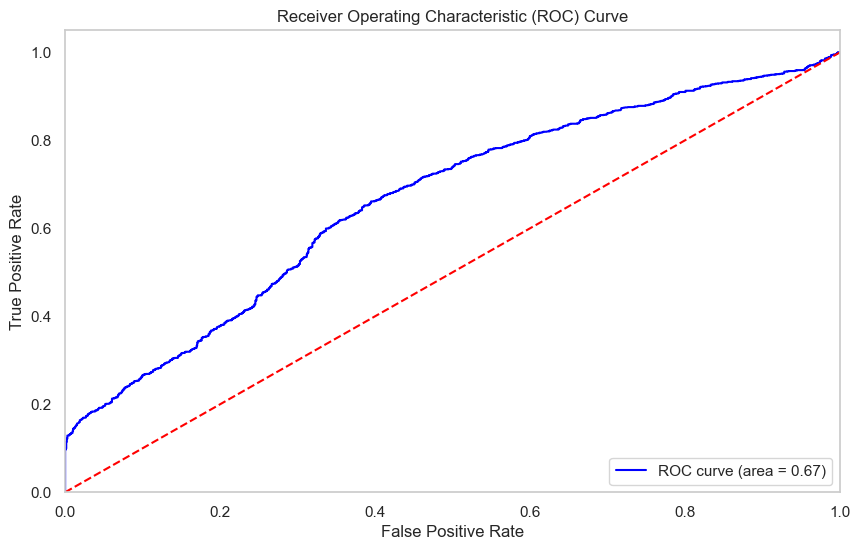

In [381]:
y_prob = logistic_down.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

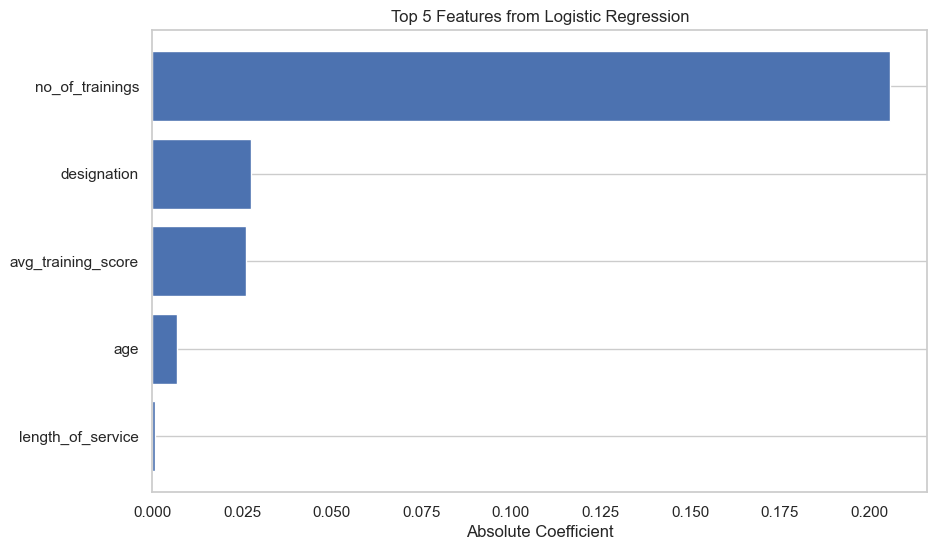

In [382]:
coefficients = logistic_down.coef_[0]  # Use [0] to get the 1D array of coefficients
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importances_df['Absolute Coefficient'] = feature_importances_df['Coefficient'].abs()
feature_importances_df = feature_importances_df.sort_values(by='Absolute Coefficient', ascending=True)

# Get the top 5 features
top_features_df = feature_importances_df.head(5)

# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 5 Features from Logistic Regression')
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.show()

In [383]:
# print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

In [384]:
# dt=DT.score(X_test, y_test)
# print('Test set\n  Accuracy: {:0.2f}'.format(DT.score(X_test, y_test))) #the accuracy of the model on test data is given below

In [385]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["Decision Tree Model", round(dt,2)])
x.add_row(["Random Forest Classifier Model", round(rn,2)])
x.add_row(["Bagging Classifier Model", round(bc,2)])
x.add_row(["XGB Classifierr Model", round(xg,2)])
x.add_row(["AdaBoost Classifier Model", round(ad,2)])
x.add_row(["Gradient Boosting Classifier Model", round(gb,2)])

print(x)
print('\n')



+------------------------------------+----------+
|               Model                | Accuracy |
+------------------------------------+----------+
|        Decision Tree Model         |   0.91   |
|   Random Forest Classifier Model   |   0.93   |
|      Bagging Classifier Model      |   0.92   |
|       XGB Classifierr Model        |   0.94   |
|     AdaBoost Classifier Model      |   0.92   |
| Gradient Boosting Classifier Model |   0.94   |
+------------------------------------+----------+


